In [26]:
from pathlib import Path

import imagededup

In [27]:
image_dir = Path('../tests/data/mixed_images')

# Hashing

#### Find duplicates using Perceptual hashing along with scores

In [38]:
from imagededup.methods import PHash

phasher = PHash()
duplicates = phasher.find_duplicates(image_dir=image_dir, scores=True)

2020-11-12 05:20:50,127: INFO Start: Calculating hashes...
INFO:imagededup.methods.hashing:Start: Calculating hashes...
  0%|          | 0/6 [00:00<?, ?it/s]2020-11-12 05:20:50,162: WARNING Invalid image file /home/ubuntu/imagededup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg:
cannot identify image file '/home/ubuntu/imagededup/tests/data/mixed_images/ukbench09268_corrupt.jpg'
cannot identify image file '/home/ubuntu/imagededup/tests/data/mixed_images/ukbench09268_corrupt.jpg'
100%|██████████| 6/6 [00:00<00:00, 109.17it/s]
2020-11-12 05:20:50,220: INFO End: Calculating hashes!
INFO:imagededup.methods.hashing:End: Calculating hashes!
2020-11-12 05:20:50,224: INFO Start: Evaluating hamming distances for getting duplicates
INFO:imagededup.methods.hashing:Start: Evaluating hamming distances for getting duplicates
2020-11-12 05:20:50,227: INFO Start: Retrieving duplicates using Cython Brute force algorithm
INFO:imagededup.handlers.search.retrieval:Start: Retrieving duplicat

In [39]:
duplicates

{'ukbench00120_resize.jpg': [('ukbench00120.jpg', 0)],
 'ukbench09268.jpg': [],
 'ukbench00120.jpg': [('ukbench00120_resize.jpg', 0)],
 'ukbench00120_rotation.jpg': [],
 'ukbench00120_hflip.jpg': []}

### Plotting duplicates for image file: 'ukbench00120.jpg'

/home/ubuntu/venvs/my_env/lib/python3.8/site-packages/imagededup-0.2.2-py3.8-linux-x86_64.egg/imagededup/utils/plotter.py:66: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  gs.tight_layout(fig)


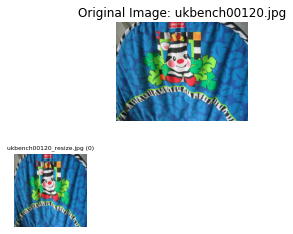

In [30]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates, filename='ukbench00120.jpg')

#### Find duplicates to remove using Perceptual hashing

In [31]:
from imagededup.methods import PHash

phasher = PHash()
duplicates_list = phasher.find_duplicates_to_remove(image_dir)

2020-11-12 05:20:22,890: INFO Start: Calculating hashes...
INFO:imagededup.methods.hashing:Start: Calculating hashes...
  0%|          | 0/6 [00:00<?, ?it/s]2020-11-12 05:20:22,917: WARNING Invalid image file /home/ubuntu/imagededup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg:
cannot identify image file '/home/ubuntu/imagededup/tests/data/mixed_images/ukbench09268_corrupt.jpg'
cannot identify image file '/home/ubuntu/imagededup/tests/data/mixed_images/ukbench09268_corrupt.jpg'
100%|██████████| 6/6 [00:00<00:00, 110.76it/s]
2020-11-12 05:20:22,973: INFO End: Calculating hashes!
INFO:imagededup.methods.hashing:End: Calculating hashes!
2020-11-12 05:20:22,977: INFO Start: Evaluating hamming distances for getting duplicates
INFO:imagededup.methods.hashing:Start: Evaluating hamming distances for getting duplicates
2020-11-12 05:20:22,980: INFO Start: Retrieving duplicates using Cython Brute force algorithm
INFO:imagededup.handlers.search.retrieval:Start: Retrieving duplicat

In [32]:
duplicates_list

['ukbench00120.jpg']

# CNN

#### Find duplicates using CNN along with scores

In [33]:
from imagededup.methods import CNN

cnn_encoder = CNN()
duplicates_cnn = cnn_encoder.find_duplicates(image_dir=image_dir, scores=True)

2020-11-12 05:20:23,624: INFO Initialized: MobileNet pretrained on ImageNet dataset sliced at last conv layer and added GlobalAveragePooling
INFO:imagededup.methods.cnn:Initialized: MobileNet pretrained on ImageNet dataset sliced at last conv layer and added GlobalAveragePooling
2020-11-12 05:20:23,629: INFO Start: Image encoding generation
INFO:imagededup.methods.cnn:Start: Image encoding generation
/home/ubuntu/venvs/my_env/lib/python3.8/site-packages/tensorflow-2.4.0rc1-py3.8-linux-x86_64.egg/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
2020-11-12 05:20:23,686: WARNING Invalid image file /home/ubuntu/imagededup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg:
cannot identify image file '/home/ubuntu/imagededup/tests/data/mixed_images/ukbench09268_corrupt.jpg

1/1 [==============================] - 1s 690ms/step


2020-11-12 05:20:24,408: INFO End: Image encoding generation
INFO:imagededup.methods.cnn:End: Image encoding generation
2020-11-12 05:20:24,411: INFO Start: Calculating cosine similarities...
INFO:imagededup.methods.cnn:Start: Calculating cosine similarities...
2020-11-12 05:20:24,414: INFO End: Calculating cosine similarities.
INFO:imagededup.methods.cnn:End: Calculating cosine similarities.


In [34]:
duplicates_cnn

{'ukbench00120.jpg': [('ukbench00120_hflip.jpg', 0.96725523),
  ('ukbench00120_resize.jpg', 0.9812082)],
 'ukbench00120_hflip.jpg': [('ukbench00120.jpg', 0.96725523),
  ('ukbench00120_resize.jpg', 0.95676136)],
 'ukbench00120_resize.jpg': [('ukbench00120.jpg', 0.9812082),
  ('ukbench00120_hflip.jpg', 0.95676136)],
 'ukbench00120_rotation.jpg': [],
 'ukbench09268.jpg': []}

### Plotting duplicates for image file: 'ukbench00120.jpg'

/home/ubuntu/venvs/my_env/lib/python3.8/site-packages/imagededup-0.2.2-py3.8-linux-x86_64.egg/imagededup/utils/plotter.py:66: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  gs.tight_layout(fig)


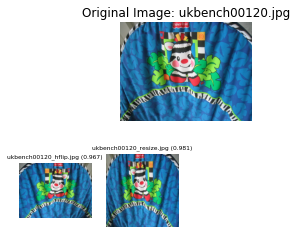

In [35]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_cnn, filename='ukbench00120.jpg')

#### Find duplicates to remove using CNN

In [36]:
from imagededup.methods import CNN

cnn_encoder = CNN()
duplicates_list_cnn = cnn_encoder.find_duplicates_to_remove(image_dir=image_dir)

2020-11-12 05:20:25,413: INFO Initialized: MobileNet pretrained on ImageNet dataset sliced at last conv layer and added GlobalAveragePooling
INFO:imagededup.methods.cnn:Initialized: MobileNet pretrained on ImageNet dataset sliced at last conv layer and added GlobalAveragePooling
2020-11-12 05:20:25,418: INFO Start: Image encoding generation
INFO:imagededup.methods.cnn:Start: Image encoding generation
/home/ubuntu/venvs/my_env/lib/python3.8/site-packages/tensorflow-2.4.0rc1-py3.8-linux-x86_64.egg/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
2020-11-12 05:20:25,475: WARNING Invalid image file /home/ubuntu/imagededup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg:
cannot identify image file '/home/ubuntu/imagededup/tests/data/mixed_images/ukbench09268_corrupt.jpg

1/1 [==============================] - 1s 660ms/step


2020-11-12 05:20:26,164: INFO End: Image encoding generation
INFO:imagededup.methods.cnn:End: Image encoding generation
2020-11-12 05:20:26,167: INFO Start: Calculating cosine similarities...
INFO:imagededup.methods.cnn:Start: Calculating cosine similarities...
2020-11-12 05:20:26,170: INFO End: Calculating cosine similarities.
INFO:imagededup.methods.cnn:End: Calculating cosine similarities.


In [37]:
duplicates_list_cnn

['ukbench00120_hflip.jpg', 'ukbench00120_resize.jpg']